As we continue working with data, though, we'll find that much of the data we encounter will be messy, and [lots of our time will be spent preparing it for analysis](https://www.theanalysisfactor.com/preparing-data-analysis/). These preparations, known as **data cleaning**, include:

* Removing data we don't need for our analysis.
* Removing duplicate data.
* Dealing with missing data and outliers.
* Creating new variables where necessary.
* Combining separate datasets.

Data cleaning is often a non-linear process. We'll need to spend time researching our data, use our professional judgement to make decisions, and sometimes revisit our data cleaning choices mid-project. That's okay: Data cleaning is a crucial part of being a data analyst or scientist, and getting good at it takes practice.

In this file, we'll learn techniques for cleaning messy, real-world data to prepare it for analysis. As we clean these data, we'll perform analyses and visualize data

### New York City Schools Data

The datasets we'll be working with come from the [New York City Department of Education](https://www.schools.nyc.gov/). They contain data on NYC schools, including student demographics, test scores, graduation and dropout rates, and school locations.

These datasets contain interesting information that we can use to learn about the characteristics of schools located throughout a large, diverse city.

In this file, we'll focus on using the data to understand how NYC high schools' demographics (race, sex, income, etc.) affect how well students perform academically.

We'll have a chance to analyze the data to answer questions such as:

* Is there a relationship between school class size and test performance?
* Are there any demographic factors that seem to be related to student test performance?
* Does academic performance vary by school location?

The datasets are stored in six files:

* `sat_results.csv`: Data on [Scholastic Aptitude Test (SAT) scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4). The SAT is a standardized test taken by most high school students that is used to assess preparation for college.

* `ap_2010.csv` - Data on [Advanced Placement (AP) test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e). [AP tests](https://en.wikipedia.org/wiki/Advanced_Placement_exams) are taken by advanced high school students, often at schools that can afford to provide the specialized classes needed to prepare for them.

* `class_size.csv`: Data on average school [class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3).

* `demographics.csv`: Data on [demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) of NYC school students, including race and sex.

* `graduation.csv`: Data on [graduation outcomes](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a), including percentages of students who graduated or dropped out of school.

* `hs_directory.csv`: A directory of [high schools](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2) that contains location information for each school.

When we're working with new data, it's important to familiarize ourself with any available descriptions of the datasets, referred to as **metadata**, and do a bit of research to make sure we're familiar with what the data represent.

**Task**

* Import the `.csv` files listed above into R and save them as data frames

**Answer**

`library(readr)`

`sat_results <- read_csv("sat_results.csv") 
ap_2010 <- read_csv("ap_2010.csv") 
class_size <- read_csv("class_size.csv")
demographics <- read_csv("demographics.csv") 
graduation <- read_csv("graduation.csv") 
hs_directory <- read_csv("hs_directory.csv")`

Now that we've spent some time conducting research and have imported the data into R, it's time to think about what changes need to be made to the data to prepare it for analysis.

We'll start by walking through some questions to ask about new data as we prepare to clean it.

**Which data do we need for our analysis?** Often, we won't need all the data contained in datasets to answer our research questions, and it may make sense to create a new data frame containing only the necessary data. This will help us work more efficiently when we're working with large datasets.

For example, we are interested in data for NYC high schools. However, the `class_size` and `demographics` data frames also contain information about elementary schools. Some of the data frames also contain observations from multiple years, and it may make sense to work with only the most recent years' data.

**Do we need to create any new variables?** Sometimes, our analysis will require a variable that is not currently defined in our data. For example, the `sat_results` data frame contains variables for students' scores on sections of the SAT: Math, Reading, and Writing. However, for our analysis, we may want a total SAT score variable. We would need to create it by calculating the sum of the section scores.

**Are the data of the correct type?** Are any of the data that we need to use to calculate new variables, for example, formatted as character instead of numeric?

**Do we need to combine data frames?** To analyze the NYC high schools data, we ultimately want to be able to perform summary calculations and visualize relationships between variables to understand how demographic factors affect test performance. We will need to combine the six data frames into a single, clean data frame.

We can combine multiple data frames if they share a variable in common, and if that variable uniquely identifies observations. We call this variable a **key**.

In the case of these data frames, we see that nearly all of them share a variable in common: the `DBN`, or district borough number, that uniquely identifies each school.

**Do the data need to be reshaped?** When we learned to visualize data, we saw that different arrangements of variables in rows and columns were needed for different tasks. 

**Are there missing data?** In some data frames like `demographics`, there are many missing values (represented by `NA`). We will have to decide how to handle these missing values as we clean the data.

We'll begin by assessing data cleaning needs for the `sat_results` data frame. Have a look at the `sat_results` data frame using the `head()` function to return the first ten rows.

Note that each variable name is surrounded in tick marks `(``)`. This is because the titles contain spaces, which are not valid in R variable names. When we work with tidyverse functions, surrounding invalid R variable names with tick marks will allow R to interpret them properly.

The data frame contains information about each of the 477 public schools in NYC. Since we know only high school students take the SAT, the fact that each school has SAT scores listed means that these are all high schools.

**Which data do we need for our analysis?** The data frame contains six variables: Two (`DBN` and `SCHOOL NAME`) that provide information about the high school, one that tells us the number of students who took the SAT (`Num of SAT Test Takers`), and three that tell us the average scores students at each high school earned on SAT sections (`SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score`).

These variables are all relevant in the context of understanding the effect of demographics on test scores, so we will retain all the data in this data frame.

We can also see that there seems to be only one observation for each high school, so we will not need to remove any rows.

**Do we need to create any new variables?** As we researched the SAT, we may have learned that the test consists of three sections:

* Critical Reading
* Math
* Writing

For our analysis, it will probably be useful to have a variable containing average total SAT scores. We can calculate this variable by taking the sum of the SAT section scores.

**Are the data of the correct type?** To calculate the sum of the SAT section scores, we need the data to be numeric — we cannot perform arithmetic on character data. Since the data in the `Num of SAT Test Takers`, `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, `SAT Writing Avg. Score` columns is character data, we need to change it to numeric.

**Do we have a key to combine multiple data frames?** Since this data frame contains a `DBN` variable, we can use it as a key to combine it with the other data frames.

We have already learned to use a function for modifying and creating new variables: the `dplyr` function `mutate()`. Let's use it to perform some needed cleaning operations on `sat_results`. 

**Task**

1. Change the data types of the following columns from character to numeric:

 * Num of SAT Test Takers.
 * SAT Critical Reading Avg. Score.
 * SAT Math Avg. Score.
 * SAT Writing Avg. Score.


2. Create a new variable, `avg_sat_score`
3. For now, don't worry about warning messages like the following, which occur when some character values cannot be changed to numeric:

`Warning message in eval(substitute(expr), envir, enclos):
“NAs introduced by coercion”`


**Answer**

`sat_results <- sat_results %>%
    mutate(`Num of SAT Test Takers` =  as.numeric(`Num of SAT Test Takers`),
         `SAT Writing Avg. Score` = as.numeric(`SAT Writing Avg. Score`), 
         `SAT Critical Reading Avg. Score` = as.numeric(`SAT Critical Reading Avg. Score`),
         `SAT Math Avg. Score` = as.numeric(`SAT Math Avg. Score`)) %>%
    mutate(avg_sat_score = `SAT Writing Avg. Score` + `SAT Critical Reading Avg. Score` + `SAT Math Avg. Score`)`

Now that we've identified and performed data cleaning operations for the `sat_results` data frame, let's have a look at the `ap_2010` data frame and run through questions to help identify data cleaning needs.

**Which data do we need for our analysis?** Since only high school students take AP exams, we know that all the data are for high schools. We do not need to remove any rows.

The data frame contains five variables. We will need `DBN` as a key to combine data frames. `AP Test Takers` provides information about the number of students who took one AP exam, and `Total Exams Taken` tells us how many exams were taken at the school (since students can take exams in multiple subjects). The variable` Number of Exams with scores 3 4 or 5` tells us how many students earned high scores on the exams, which are scored on a scale from one (lowest) to five (highest). Since all these variables provide information about test scores, they are relevant for our analysis.

**Do we need to create any new variables?** There are a few interesting variables we can create to help us understand these data better.

Since students can take multiple AP exams, it would be interesting to calculate the average number of exams taken per student by dividing **Total Exams Taken** by **AP Test Takers**.

We could also calculate the percentage of high-scoring AP exams by dividing `Number of Exams with scores 3 4 or 5` by `Total Exams` Taken and multiplying by 100.

**Are the data of the correct type?** As was the case for `sat_results`, the data in `ap_2010` are all formatted as character data. We'll need to change them to numeric.

Before we perform the data cleaning operations on `ap_2010`, let's return for a moment to how we changed the data type of variables in `sat_results`.

To change the data types of the sat_results variables `Num of SAT Test Takers`, `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, `SAT Writing Avg. Score` from character to numeric, we probably wrote code that looked like this:

`sat_results <- sat_results %>%
  mutate(`Num of SAT Test Takers` =  as.numeric(`Num of SAT Test Takers`),
         `SAT Writing Avg. Score` = as.numeric(`SAT Writing Avg. Score`), 
         `SAT Critical Reading Avg. Score` = as.numeric(`SAT Critical Reading Avg. Score`),
         `SAT Math Avg. Score` = as.numeric(`SAT Math Avg. Score`))`

If we are copying and pasting repeatedly, there is probably a better coding solution.

In this case, a better solution exists in the form of the `dplyr` function `mutate_at()`. The `mutate_at()` function is a [scoped](https://dplyr.tidyverse.org/reference/scoped.html) variant of the `mutate()` function. This means we can use it to perform an operation on all variables within a specified subset.

Let's look at how we could change the data type of the four columns in `sat_results` using `mutate_at()` instead of `mutate()`:

`sat_results <- sat_results %>%
  mutate_at(vars(`Num of SAT Test Takers`: `SAT Writing Avg. Score`), as.numeric)`

Notice that instead of typing out the names of all the columns we want to modify, we can use a colon (`:`) to specify the range. This is useful in the event that we need to modify dozens of variables.

We can also specify the numbers of the columns we want to modify:

`sat_results <- sat_results %>% mutate_at(3:6, as.numeric)`

When we use column numbers within `mutate_at()`, notice that we don't need to use `vars()` (which stands for "variables").

We've learned to efficiently change the data type of multiple data frame columns, let's clean the `ap_2010` data frame.

**Task**

1. Use the `mutate_at()` function to change the `AP Test Takers`, `Total Exams Taken`, and `Number of Exams with scores 3 4 or 5` variables to numeric.

2 .Add two new variables to the data frame:

 * `exams_per_student`: The average number of AP exams taken by each student.
 * `high_score_percent`: The percentage of all exams with scores of three, four, or five.
 
3. Save the modified data frame as `ap_2010` to overwrite the original.

**Answer**

`ap_2010 <- ap_2010 %>%
  mutate_at(3:5, as.numeric) %>%
  mutate(exams_per_student = `Total Exams Taken` / `AP Test Takers`) %>%
  mutate(high_score_percent = (`Number of Exams with scores 3 4 or 5`/`Total Exams Taken`)*100)`

Next, let's have a look at the `class_size` data frame to identify data cleaning needs.

This data frame contains information about class sizes associated with different grades and classes of NYC schools.

Information about class size, the variables `AVERAGE CLASS SIZE`, `SIZE OF SMALLEST CLASS`, `SIZE OF LARGEST CLASS`, may be useful in our analysis of how demographic factors may affect student academic performance. For example, wealthier schools may be able to offer smaller classes because they can afford more teachers.

One of the first things that's apparent when we look at `class_size` is that there are multiple rows for each school. Let's figure out why.

First, look at the `GRADE` column. It appears that each school has multiple rows for different grades. Since we are only interested in high schools, we can select only rows in this dataset for which the `GRADE` variable has the value of `"09-12"` — grades that are considered part of high school in the U.S.

Next, look at the `PROGRAM TYPE` column. Some schools have several different types of programs. For consistency among datasets, let's only keep rows for which `PROGRAM TYPE` has the value of `"GEN ED"`, which is short for "general education."

Let's start cleaning the` class_size` data frame by removing rows that are not necessary for our analysis.

**Task**

* Filter the `class_size` data frame to retain only rows where values of `GRADE` are equal to `"09-12"` and values of `PROGRAM TYPE` are `"GEN ED"`.

**Answer**

`class_size <- class_size %>%
  filter(GRADE == "09-12", `PROGRAM TYPE` == "GEN ED")`

We have now filtered the `class_size` data frame to retain only observations for general education classes at high schools, but there is still some work to be done. The new, filtered data frame still contains multiple rows for some of the high schools. The rows contain information about class sizes of various courses (see the `CORE COURSE (MS CORE and 9-10 ONLY)` variable).

To calculate single values for class size variables for each high school, we can calculate an average across courses. We may recall working on split-apply-combine problems by grouping the data frame by one variable (in this case, it would be the `SCHOOL NAME` variable) and calculating a summary statistic using the `summarize()` function.

This approach will work well for calculating high school averages for the `AVERAGE CLASS SIZE`, `SIZE OF SMALLEST CLASS`, and `SIZE OF LARGEST CLASS` variables.

Before we use `group_by()` and `summarize()` to calculate the averages, though, we need to make sure all necessary variables will be retained in the summary data frame.

Let's look once again at the `class_size` data frame.

Recall that we will need the data frame to contain the variable `DBN` so we can use it as a key to join the data frames together. After spending time working with the `sat_results` and `ap_2010` data frames, we may notice that `DBN` appears is a combination of `CSD` and `SCHOOL CODE`. We will need this information soon to create a `DBN` key for the `class_size` data frame.

When we group the data frame using `group_by()`, be sure to list the following variables so they are included in the summary data frame we produce using `summarize()`:

* CSD
* SCHOOL CODE
* SCHOOL NAME

Since `CSD` and `SCHOOL CODE` are the same for each value of `SCHOOL NAME`, including them in the `group_by()` function simply ensures they are included in the summary data frame.

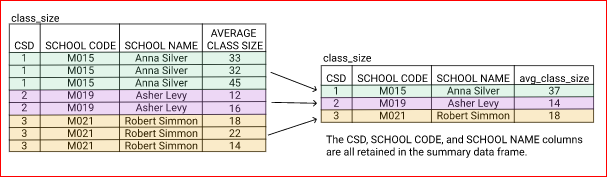

**Task**

1. Create a new class_size data frame that contains:

 * The following variables from the original data frame:

    * CSD
    * SCHOOL CODE
    * SCHOOL NAME
    
 * The following new variables:

    * avg_class_size (average of AVERAGE CLASS SIZE for each school)
    * avg_largest_class (average of SIZE OF LARGEST CLASS for each school)
    * avg_smallest_class (average of SIZE OF SMALLEST CLASS for each school)
    
**Answer**

`class_size <- class_size %>%
  group_by(CSD, `SCHOOL CODE`, `SCHOOL NAME`) %>%
  summarize(avg_class_size = mean(`AVERAGE CLASS SIZE`), 
            avg_largest_class = mean(`SIZE OF LARGEST CLASS`),
            avg_smallest_class = mean(`SIZE OF SMALLEST CLASS`))`

The new `class_size` data frame is now simplified to contain the information we'll need for our analysis. There is one row for each high school, and averages for smallest class size, largest class size, and average class size.

This data frame is nearly ready for analysis, but there's one more step we'll need to complete: Creating a `DBN` variable that we can use as a key to join the data frames.

We previously made the observation that the `DBN` variable in the other data frames appears to be a combination of `CSD` and `SCHOOL CODE`, and so we retained those variables in the summarized `class_size` data frame. We can confirm this by comparing the `CSD` and `SCHOOL CODE` values for a few high schools in the `class_size` data frame with the `DBN` of those high schools in the `sat_results` or `ap_2010` data frames.

To combine `CSD` and `SCHOOL CODE` into a new `DBN` variable, we will need to use techniques for string manipulation.

Compare the formats of `CSD` and `SCHOOL CODE` in the `class_size` data frame and `DBN` in the `sat_results` data frame:

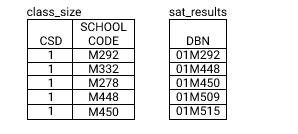

We can begin by creating a new variable, `DBN`, in the `class_size` data frame by combining `CSD` and `SCHOOL CODE`. Notice that the `sat_results` `DBN` values all have six digits -- there is a zero at the beginning of the number.

**Task**

* Create a new `DBN` variable in the `class_size` data frame.

**Answer**

`library(stringr)`

`class_size <- class_size %>%
  mutate(DBN = str_c(CSD, `SCHOOL CODE`, sep = "")) %>%
  mutate(DBN = str_pad(DBN, width = 6, side = 'left', pad = "0"))`

We've now cleaned the `sat_results`, `ap_2010`, and `class_size` data frames. We've simplified them so that they contain data relevant to our analysis, made sure data types are correct, created necessary variables, and made sure that each data frame contains a `DBN` variable to serve as a key for combining the data frames.

We have three data frames left to work on. Let's look at the `graduation` data frame.

As was the case for `class_size`, there are multiple rows for each school in the `graduation` data frame. This is because, for each school, there are rows for different demographics and for multiple years.

Let's focus on graduation rates for each school's entire cohort by selecting rows for which the value of `Demographic` is "Total Cohort". We'll work with the most current graduation data, which is from 2006.

Do we need all the variables in the data frame for our analysis? To understand students' academic success, the most relevant variables are probably the ones that have to do with whether students successfully graduate or if they drop out: `Total Grads - % of cohort` and `Dropped Out - % of cohort`.

This data frame has a `DBN` variable, and it doesn't seem that we need to create any new variables.

**Task**

Create a new graduation data frame that contains only:

* Data for the total cohort of students (the `Demographic` variable).
* Data from the 2006 Cohort (do not include rows for which values of `Cohort` are "2006 Aug").
* The variables `DBN`, `School Name`, `Total Grads - % of cohort`, `Dropped Out - % of cohort`.

**Answer**

`graduation <- graduation %>%
  filter(Cohort == "2006" & Demographic == "Total Cohort") %>%
  select(DBN, `School Name`, `Total Grads - % of cohort`, `Dropped Out - % of cohort`)`

Have a look at the `demographics` data frame next. Like the `class_size` and `graduation` data frames, this one has multiple rows for each school.

There are data for multiple years (the `schoolyear` variable). Let's work with data from the most recent year, rows for which values of `schoolyear` are "20112012".

The duplicate rows for each school also are due to the fact that data from elementary schools, as well as high schools, are included in `demographics`. There are columns (`grade_1`, `grade_2`, etc.) that contain the number of students in each grade for each school. Because we are only interested in working with high schools (grades 9, 10, 11, and 12), we can filter the data to select only schools for which the value of one of the high school grade columns (like `grade_9` or `grade_10`) is not "NA").

The data frame also contains a number of columns that seem to contain very little data or are not likely to be useful in our analysis.

For example, there are columns that provide information about the number of students that are English Language Learners (`ell_num`). Comparing numbers of students among schools isn't likely informative because schools have different total numbers of enrolled students. Instead, using `ell_percent` to compare percentages of English Language Learners among schools would be more useful.

For our analysis, we will retain variables that provide information about percentages of students of different races and sexes:

* asian_per
* black_per
* hispanic_per
* white_per
* male_per
* female_per

We'll also retain variables that provide information about the percentage of students in programs that can indicate socioeconomic conditions of schools' student body:

* `frl_percent`: The percentage of students who receive lunch at a price discount.
* `total_enrollment`: The size of the school.
* `ell_percent`: The percentage of students who do not speak English as their first language.
* `sped_percent`: The percentage of students participating in special education programs.

**Task**

1. Create a new `demographics` data frame that contains only:

    * Rows for which values of `schoolyear` are "20112012" and values of `grade9` are not "NA"
    
    
2. Columns containing the following variables:

    * DBN
    * Name
    * frl_percent
    * total_enrollment
    * ell_percent
    * sped_percent
    * asian_per
    * black_per
    * hispanic_per
    * white_per
    * male_per
    * female_per
    
**Answer**


`demographics <- demographics %>%
  filter(schoolyear == "20112012" & grade9 != "NA") %>%
  select(DBN, Name, frl_percent, total_enrollment, ell_percent, 
         sped_percent, asian_per, black_per, 
         hispanic_per, white_per, male_per, female_per)`
   

In `demographics` we see that columns `male_per`, and `female_per` are complementary to each other, so we can remove one of them. Let's remove the last column, `female_per`. We can use three techniques to do this:

1. We can use the technique we have already learned by listing the first 11 columns.

`demographics_clean <- demographics %>%
  select(DBN, Name, frl_percent, total_enrollment, ell_percent, 
         sped_percent, asian_per, black_per, 
         hispanic_per, white_per, male_per)` # we removed `female_per` from here.

2. We can use a **range of variables**, i.e., provide to the `select()` function the first variable name, followed by a colon, followed by the name of the last variable. This is possible because the desired variables are consecutive.

`demographics_clean <- demographics %>%
  select(DBN:male_per)` # here we used the range of variables.

3. Finally, we can remove the few variables not concerned (in our case here only `female_per`) by adding a dash symbol in front of the name of unwanted variables. We denote these columns as **negative columns.**

`demographics_clean <- demographics %>%
  select(-female_per)` #we used -`female_per` to remove it.

**Task**

Create a new demographics_clean data frame by removing the Name and the female_per columns from the demographics data frame available from the previous screen.

**Answer**

`demographics_clean <- demographics %>%
  select(-Name, -female_per)`

It's time to clean the last data frame: `hs_directory`. It contains some pieces of information that will be useful for us later on when we want to look at patterns based on school locations: GPS [coordinates](https://en.wikipedia.org/wiki/Geographic_coordinate_system).

These coordinates are buried within character strings contained in the `Location 1` variable column. We can simplify this data frame to retain only the `Location 1` column and columns to identify the school.

The `hs_directory` data frame does contain a `DBN` variable to use as a key, but notice that it is named with lowercase letters (`dbn`). We will need to capitalize it. The `dplyr` package contains a handy function, `rename()`, for this purpose.

The syntax for using the `rename()` function to rename a column in a data frame is:

`data_frame %>%
    rename(new_column_name = old_column_name)`

**Task**

1. Create a new `hs_directory` data frame that contains columns for the variables `dbn`, `school_name`, and `Location 1`.

2. Rename the `dbn` variable so it's consistent with the `DBN` variables in the other data frames.

**Answer**

`hs_directory <- hs_directory %>%
  rename(DBN = dbn) %>%
  select(DBN, school_name, `Location 1`)`


There are a variety of different ways we could check for duplicate values of `DBN` within each data frame, but one we find to be especially efficient: Using the `duplicated()` function.

`duplicated()` is a base R function, so we don't need to load any new packages to use it. The function takes a vector as input and returns a logical vector that indicates whether the value is a duplicate of one that comes before it in the vector.

To illustrate how this works, let's create a vector with a duplicated value:

`vector <- c(1,2,3,4,5,5,6)`

If we apply the `duplicated()` function to vector, the output is a vector of logical data:

`duplicated(vector)`

`FALSE FALSE FALSE FALSE FALSE  TRUE FALSE`

Because the second instance of `5` in `vector` is in the sixth position, the sixth value of the output of `duplicated()` is TRUE.

We could apply the `duplicated()` function to each data frame's `DBN` column, for example:

`duplicated(sat_results$DBN)
duplicated(ap_2010$DBN)
duplicated(class_size$DBN)`

etc.

However, there are a few problems with this approach. First, the output of `duplicated()` is a vector that we'd have to search for values of `TRUE`. While we could index the logical vector into the `DBN` vector to return the duplicate values, we'd be doing a lot of repeated typing. As we have consistently emphasized, there is a better way!

Instead, we can combine the `duplicated()` function with `purrr` package functionals and `dplyr` data frame manipulation tools.

The first step is to create a list of the data frames so we can use a functional to perform the same operation on each data frame.

Next, we'll use the map() functional and mutate() to create a new column with the logical output of duplicate(). This will allow us to filter the data frame to return rows where the value of the new "is it duplicated?" column is "TRUE."

Let's break this down, because the syntax is a little different when we use these approaches together.

We will use the `map()` functional, because we want to apply a function to a list and return a list. Remember that functionals like `map()` take a function as input. In this case, the function we want to apply to each data frame in the list is `mutate()`, because we want to add a new column to each.

`list %>% map(mutate)`

When working with the `mutate()` function to add a new column to a data frame, we need to specify what the new column will contain. In this case, the new column will contain the logical output of applying the `duplicated()` function to the DBN variable:

`list %>% map(mutate, is_dup = duplicated(DBN))`

Finally, we can use the `map()` functional to apply the `filter()` function to return rows of each data frame for which the new `is_dup` variable are "TRUE."

**Task**

1. Create a list of the six data frames named `ny_schools`. Assign the data frames in the list the following name attributes:

    * sat_results
    * ap_2010
    * class_size
    * demographics
    * graduation
    * hs_directory
    
2. Write code to return a list of rows from each data frame that contain duplicate values of `DBN`. Name the column of duplicated values `is_dup` and save the list as `duplicate_DBN`.

**Answer**

`library(purr)`

`ny_schools <- list(sat_results, ap_2010, class_size, demographics, graduation, hs_directory)
names(ny_schools) <- c("sat_results", "ap_2010", "class_size", "demographics", "graduation", "hs_directory")`

`duplicate_DBN <- ny_schools %>%
  map(mutate, is_dup = duplicated(DBN))  %>%
  map(filter, is_dup == "TRUE")`

We have now generated a list of rows from each data frame that contain duplicate values of `DBN`.

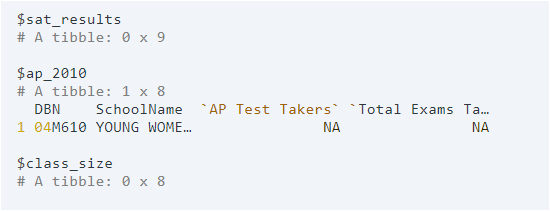

Only `ap_2010` has a duplicate `DBN` value. If we use `filter()` take a look at rows containing the duplicated DBN value:

`ap_2010 %>% filter(DBN == "04M610")`

We can see that there are two rows that correspond to a `DBN` value of "04M610":

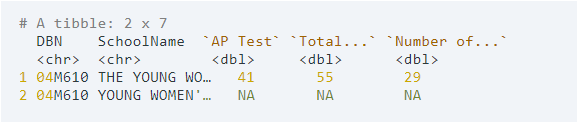

Only one of the rows, corresponding to the school name "THE YOUNG WOMEN'S LEADERSHIP SCHOOL OF EAST HARLEM", contains data. Therefore, we can remove the row with the school name "YOUNG WOMEN'S LEADERSHIP SCH".|

**Task**

Create a new `ap_2010` data frame that does not contain a row with the value "YOUNG WOMEN'S LEADERSHIP SCH" for `SchoolName`.

**Answer**

`ap_2010 <- ap_2010 %>%
  filter(SchoolName != "YOUNG WOMEN'S LEADERSHIP SCH")`